In [76]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [77]:
data = pd.read_csv("Titanic_train.csv")
data_test = pd.read_csv("Titanic_test.csv")

In [78]:
# Look at first 5 rows
print(data.head())
print(data_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [79]:
# Info about dataset (columns, datatypes, missing values)
print(data.info())
print(data_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [80]:
# Summary statistics (numerical columns)
print(data.describe())
print(data_test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [81]:
# Check missing values
print(data.isnull().sum())
print('\n',data_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [82]:
# Fill missing Age with median
data["Age"].fillna(data["Age"].median(), inplace=True)

# Fill missing Embarked with mode (most frequent value)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
data.drop("Cabin", axis=1, inplace=True)

/tmp/ipython-input-1437142365.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
/tmp/ipython-input-1437142365.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [83]:
# Fill missing Age with median
data_test["Age"].fillna(data_test["Age"].median(), inplace=True)

# Fill missing Embarked with mode (most frequent value)
data_test["Embarked"].fillna(data_test["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
data_test.drop("Cabin", axis=1, inplace=True)
#Fill missing value Fare column
data_test["Fare"].fillna(data_test["Fare"].median(), inplace=True)

/tmp/ipython-input-2970968442.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test["Age"].fillna(data_test["Age"].median(), inplace=True)
/tmp/ipython-input-2970968442.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [84]:
# Check missing values
print(data.isnull().sum())
print('\n',data_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


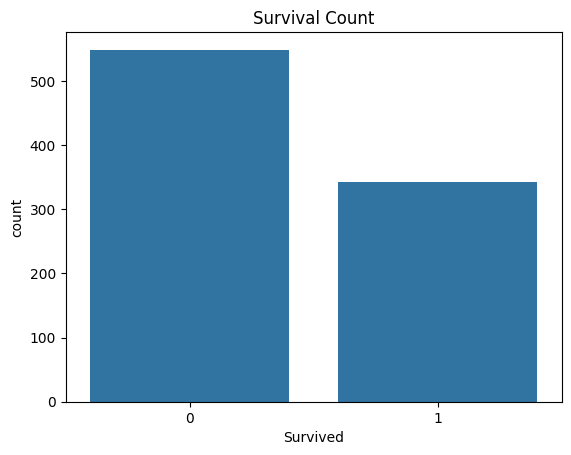

In [85]:
# Visualize survival count
sns.countplot(x="Survived", data=data)
plt.title("Survival Count")
plt.show()

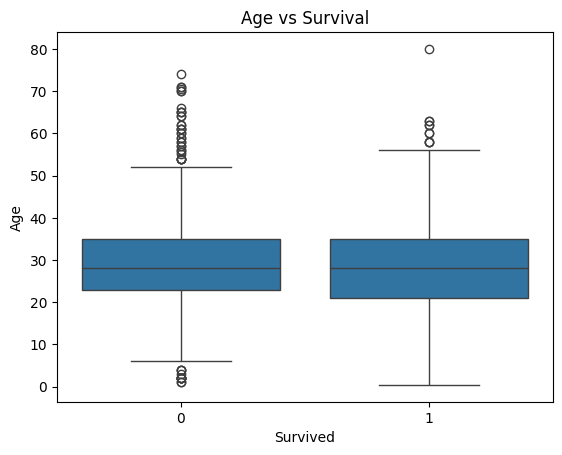

In [86]:
# Boxplot of Age by Survival
sns.boxplot(x="Survived", y="Age", data=data)
plt.title("Age vs Survival")
plt.show()

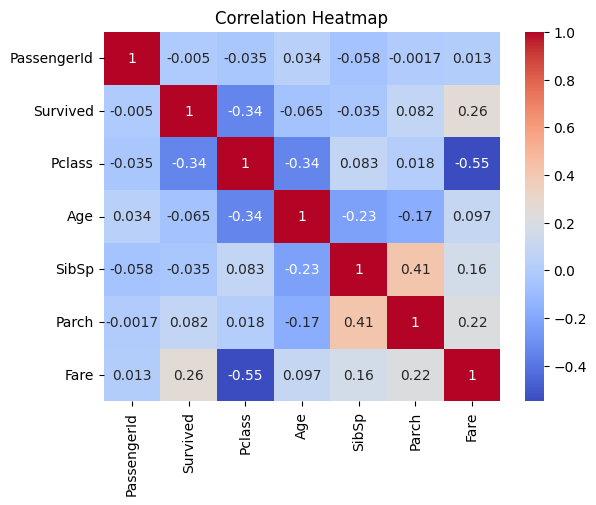

In [87]:
# Heatmap for correlations
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [88]:
# Encode categorical columns (Sex, Embarked)
label = LabelEncoder()
data["Sex"] = label.fit_transform(data["Sex"])  # Male=1, Female=0
data["Embarked"] = label.fit_transform(data["Embarked"])


In [89]:
# Drop PassengerId, Name, Ticket (not useful for prediction)
data.drop(["PassengerId", "Name", "Ticket"], axis=1,) # Install PPS if not already installed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [90]:
# 3. MODEL BUILDING
# Define features (X) and target (y)
X_train = data.drop("Survived", axis=1)
y_train = data["Survived"]

In [91]:
# Split into training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Build logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [93]:
X_test=data_test.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [94]:
# Encode categorical columns (Sex, Embarked) for test dataset
label = LabelEncoder()
X_test["Sex"] = label.fit_transform(X_test["Sex"])  # Male=1, Female=0
X_test["Embarked"] = label.fit_transform(X_test["Embarked"])

In [58]:
X_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


In [95]:
X_test["Fare"].fillna(X_test["Fare"].median(), inplace=True)

/tmp/ipython-input-1512639164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["Fare"].fillna(X_test["Fare"].median(), inplace=True)


In [96]:
y_train_pred = model.predict(X_train) # Getting trainning accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

Training Accuracy: 0.800561797752809


In [100]:
y_val_pred = model.predict(X_val) #getting validation accurscy
y_val_prob = model.predict_proba(X_val)[:,1]
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_acc)

Validation Accuracy: 0.8100558659217877


In [101]:
# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1] #getting prediction for test data since we have no target is test data
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [102]:
#  accuracy Metrics
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1-Score:", f1_score(y_val, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_pred, y_pred_prob))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-Score: 0.7638888888888888
ROC-AUC: 1.0


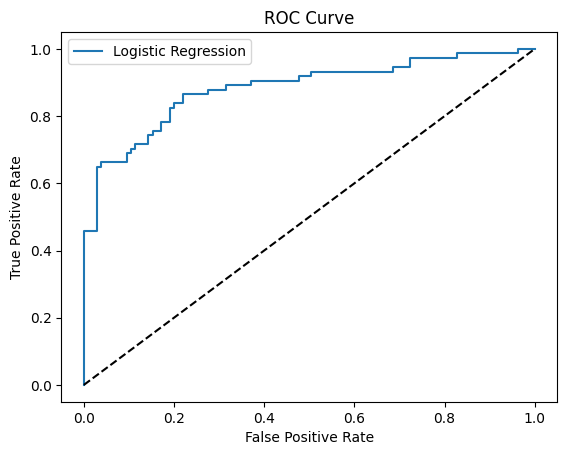

In [104]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [105]:
# Coefficients of logistic regression
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
print(coefficients)


    Feature  Coefficient
0    Pclass    -0.930680
1       Sex    -2.596994
2       Age    -0.030433
3     SibSp    -0.293905
4     Parch    -0.111853
5      Fare     0.002534
6  Embarked    -0.218777


In [109]:
# 6. DEPLOYMENT WITH STREAMLIT (save model for later use)
import pickle

# Save trained model
with open("logistic_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved! You can load this in Streamlit for deployment.")

Model saved! You can load this in Streamlit for deployment.


In [108]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.5 MB/s eta 0:00:00


In [110]:
import streamlit as st

# Load the saved logistic regression model
with open("logistic_model.pkl", "rb") as file:
    model = pickle.load(file)

st.title("🚢 Titanic Survival Prediction App")
st.write("Enter passenger details to predict the survival probability.")

# Sidebar inputs
pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
sex = st.radio("Sex", ["Male", "Female"])
age = st.slider("Age", 0, 80, 25)
sibsp = st.number_input("Number of Siblings/Spouses aboard (SibSp)", min_value=0, max_value=10, value=0)
parch = st.number_input("Number of Parents/Children aboard (Parch)", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare Ticket Price", min_value=0.0, max_value=600.0, value=32.0)
embarked = st.selectbox("Port of Embarkation", ["C = Cherbourg", "Q = Queenstown", "S = Southampton"])

# Convert categorical values into numerical (as per preprocessing)
sex_num = 1 if sex == "Male" else 0
embarked_map = {"C = Cherbourg": 0, "Q = Queenstown": 1, "S = Southampton": 2}
embarked_num = embarked_map[embarked]

# Make input dataframe
input_data = pd.DataFrame({
    "Pclass": [pclass],
    "Sex": [sex_num],
    "Age": [age],
    "SibSp": [sibsp],
    "Parch": [parch],
    "Fare": [fare],
    "Embarked": [embarked_num]
})

# Prediction
if st.button("Predict Survival"):
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.success(f"Passenger is likely to SURVIVE (Probability: {probability:.2f})")
    else:
        st.error(f"Passenger is likely to NOT SURVIVE (Probability: {probability:.2f})")

st.write("---")
st.caption("Model: Logistic Regression trained on Titanic dataset.")


2025-10-03 19:52:47.251 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:52:47.849 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-03 19:52:47.853 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:52:47.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:52:47.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:52:47.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:52:47.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:52:47.868 Thread 'MainThread': mi

DeltaGenerator()